<a href="https://colab.research.google.com/github/tommy539/Data-Science-Project/blob/master/Handwritten%20Digit%20Recognition/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition

Handwritten recognition is known as an important task that transfroms a language from a raw form into digital format. This is one of the most important steps in machine learning nowadays since it allows us to explore more information created by humanbeing in our daily life. 

This project demonstrates how to read the handwritten digits and convert them into digital format by using machine learning. Logistic regression was firstly used to explore the dataset and KNN was the finally model I used in this project with a high predicting accuracy of 97%.

In the first section I would use a simplier dataset from sklearn with a low resolution (8x8 pixel) and only around 1800 digits to train with. I would use logistic regression classification and K-nearest Neighbor classification (KNN) to compare their performance on predicting handwritten digits. We will find that KNN performs much better than logistic model - KNN gives 99% accuracy in this data while logistic was 97.6%. 

In the second section I would apply the K-nearest Neighbor model to train a more complicated dataset, the famous MNIST dataset, with a higher resolution (28x28 pixel) and larger data size (n=70000). The model gives a promising result with a 97% accuracy on testing data.

# Import Library
Here are all the libraries used in this project.

In [0]:
# digits dataset
from sklearn.datasets import load_digits #first section
from sklearn.datasets import fetch_openml #second section 

In [0]:
# data manipulation
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd

In [4]:
# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# modelling
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.neighbors import KNeighborsClassifier # KNN 
from sklearn.metrics import classification_report # Result evaluation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Section 1: Simple Digit dataset
This section used a simple dataset with 8x8 pixel. Logistic regression and K-nearest Neighbor classification are used to predict the handwritten digits. 

## 1.1 Data loading and preview

In [0]:
# import the dataset
digits = load_digits()

This dataset contains 1797 digits and 8x8 pixels.

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

Let's have a glance at our dataset. They are indeed in a low quality (blurred) comparing to what we have seen and used in our daily life. 

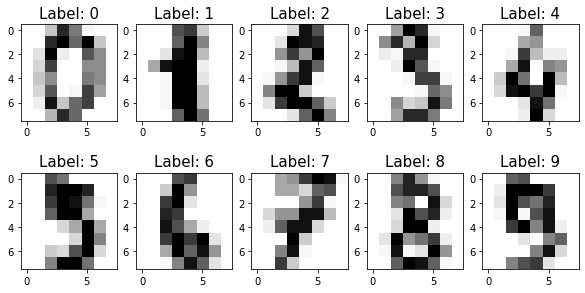

In [7]:
plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='Greys')
    plt.title('Label: %i' % label, fontsize = 15)

## 1.2 Training data and testing data splitting
In order to perform machine learning, the dataset is divided into two sets - training data and testing data. 

By using the build-in function in sklearn, we are able to split the dataset in a random way to ensure the order of data would be bias in the model training.

In [0]:
x = digits.data.astype('float32')
y = digits.target.astype('int64')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## 1.3 Logistic Regression
Logistic regression is one of the fundamental models in machine learning which fits the inputs in a regression formula and makes predictions by applying a sigmoid function over the result from the regression formula hence passing the result into decision boundary.

In [0]:
LR_classification = LogisticRegression(multi_class='multinomial',solver='sag')

In [18]:
LR_classification.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# define a function to calculate the predicting accuracy
def accuracy(a,b):
    return sum(a==b)/len(a)

In [20]:
accuracy(LR_classification.predict(x_test),y_test)

0.9666666666666667

In [0]:
wrong_x = x_test[LR_classification.predict(x_test) != y_test]
wrong_y = LR_classification.predict(x_test)[LR_classification.predict(x_test) != y_test]
correct_y = y_test[LR_classification.predict(x_test) != y_test]

In [22]:
len(wrong_y)

15

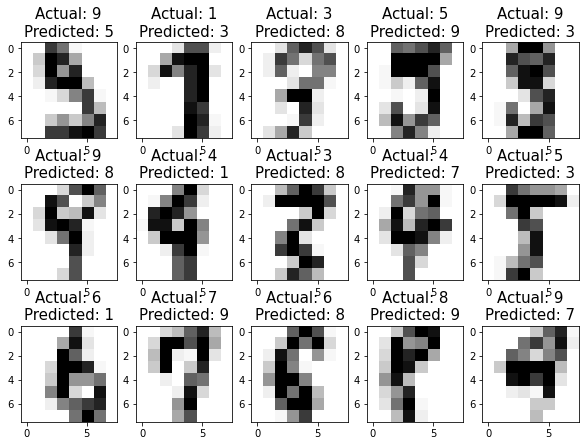

In [24]:
plt.figure(figsize=(10,10))
for index, (image, w_label,r_label) in enumerate(zip(wrong_x, wrong_y,correct_y)):
    plt.subplot(len(wrong_x)//5 + 1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='Greys')
    plt.title('Actual: %i\nPredicted: %i' % (r_label,w_label), fontsize = 15)

## 1.4 K-nearest Neighbor classification (KNN)

In [25]:
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_predict_train = neigh.predict(x_train)
knn_predict_test = neigh.predict(x_test)

In [27]:
print('Training accuracy: %.3f \nTesting  accuracy: %.3f' 
      % (accuracy(y_train, knn_predict_train),accuracy(y_test, knn_predict_test)))

Training accuracy: 0.989 
Testing  accuracy: 0.984


In [28]:
%%time
## run the KNN for different k nearest neighbors
k = []
knn_fit = []
train_accuracy = []
test_accuracy = []
predict_result = []
for each in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=each)
    knn_fit.append(neigh.fit(x_train, y_train))
    knn_predict_train = knn_fit[-1].predict(x_train)
    knn_predict_test = neigh.predict(x_test)
    predict_result.append(knn_predict_test)
    k.append(each)
    train_accuracy.append(accuracy(y_train, knn_predict_train))
    test_accuracy.append(accuracy(y_test, knn_predict_test))

CPU times: user 6.77 s, sys: 12.2 ms, total: 6.78 s
Wall time: 6.78 s


In [0]:
KNN_result = pd.DataFrame({'k':k,'Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy})

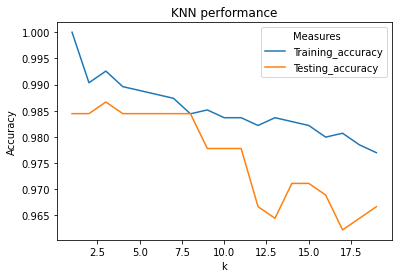

In [30]:
plt.title('KNN performance')
knn_plot = sns.lineplot(x="k", y="Accuracy", hue="Measures",
             data=KNN_result.melt('k', var_name='Measures',  value_name='Accuracy'))

In [31]:
best_KNN_result = KNN_result[KNN_result.Testing_accuracy == max(test_accuracy)]
best_KNN_k = int(list(best_KNN_result.k)[0])
best_KNN_result

,k,Training_accuracy,Testing_accuracy
2,3,0.992576,0.986667


In [32]:
print(classification_report(y_test, knn_fit[best_KNN_k-1].predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        49
           3       0.94      0.97      0.96        34
           4       1.00      0.98      0.99        59
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        49
           7       0.95      0.97      0.96        40
           8       0.98      1.00      0.99        41
           9       0.98      0.94      0.96        47

    accuracy                           0.99       450
   macro avg       0.98      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [0]:
wrong_x = x_test[predict_result[best_KNN_k-1] != y_test]
wrong_y = predict_result[best_KNN_k-1][predict_result[best_KNN_k-1] != y_test]
correct_y = y_test[predict_result[best_KNN_k-1] != y_test]

### Error cases
Here are the 6 digits wrongly classified by KNN model among around 1800 digits.

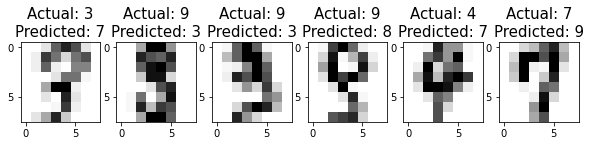

In [36]:
plt.figure(figsize=(10,5))
for index, (image, w_label,r_label) in enumerate(zip(wrong_x, wrong_y,correct_y)):
    plt.subplot(len(wrong_x)//6 + 1, 6, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='Greys')
    plt.title('Actual: %i\nPredicted: %i' % (r_label,w_label), fontsize = 15)

# Section 2: MNIST dataset
From the result of section 1, we believe that KNN classifier gives a better result in recongising handwritten digits.

Now, I will use a advanced dataset which has a larger data size and more detailed digits - 70000 digits with 28*28 pixel.
## 2.1 Data loading and preview

In [0]:
mnist = fetch_openml('mnist_784')

In [0]:
x = mnist.data.astype('float32')
y = mnist.target.astype('int64')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

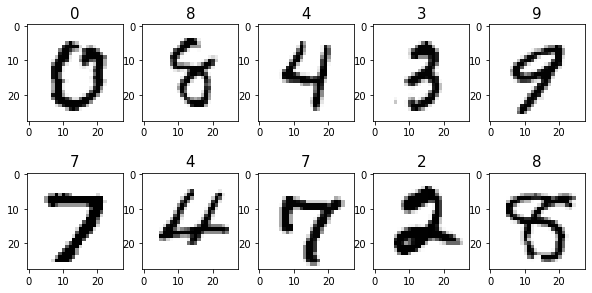

In [0]:
plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(zip(x_train[0:10], y_train[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='Greys')
    plt.title('%i' % label, fontsize = 15)

## 2.2 Model Training

In [0]:
%%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)

CPU times: user 26 s, sys: 31.8 ms, total: 26.1 s
Wall time: 26 s


In [0]:
%%time
knn_predict_train = neigh.predict(x_train)
knn_predict_test = neigh.predict(x_test)

CPU times: user 1h 21min 46s, sys: 532 ms, total: 1h 21min 47s
Wall time: 1h 21min 48s


## 2.3 Result
The KNN gives a promising result with 97% accuracy.

In [0]:
print('Training accuracy: %.3f \nTesting  accuracy: %.3f' 
      % (accuracy(y_train, knn_predict_train),accuracy(y_test, knn_predict_test)))

Training accuracy: 0.980 
Testing  accuracy: 0.970


## 2.4 Error cases
There are 529 digits predicted wrongly by KNN model. Let's have a look of some of these digits.

In [0]:
wrong_x = x_test[knn_predict_test != y_test]
wrong_y = knn_predict_test[knn_predict_test!= y_test]
correct_y = y_test[knn_predict_test != y_test]

In [0]:
len(wrong_y)

529

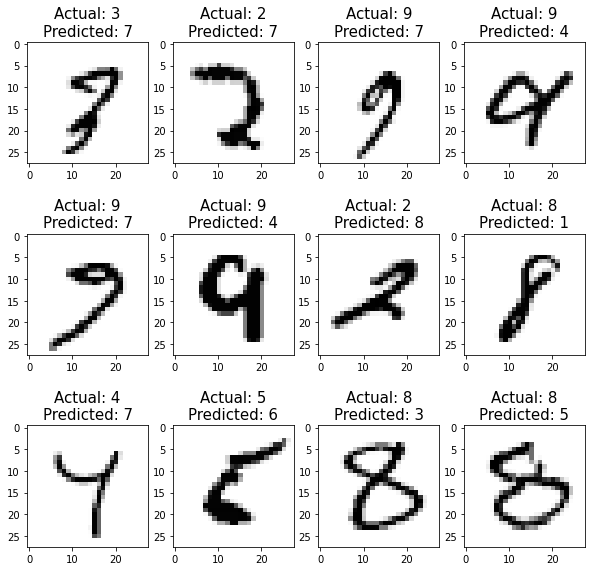

In [0]:
plt.figure(figsize=(10,10))
for index, (image, w_label,r_label) in enumerate(zip(wrong_x[0:12], wrong_y[0:12],correct_y[0:12])):
    plt.subplot(3, 4, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='Greys')
    plt.title('Actual: %i\nPredicted: %i' % (r_label,w_label), fontsize = 15)